<a href="https://colab.research.google.com/github/IALeMans/Meetup_Image_Classification_Detection_2019/blob/master/20191024_1_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification Tutorial**

Inspired by this excellent blog post : https://www.learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/

In [0]:
!pip install wget
import wget

In [0]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

**Loading and pre-processing an image**

1. Load the image. This is done using the load_img() function. Keras uses the PIL format for loading images. Thus, the image is in width x height x channels format.
1.    Convert the image from PIL format to Numpy format ( height x width x channels ) using image_to_array() function.
1.    The networks accept a 4-dimensional Tensor as an input of the form ( batchsize, height, width, channels). This is done using the expand_dims() function in Numpy.




In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#filename = 'cat2.jpg'
url = 'https://raw.githubusercontent.com/Sid2697/Object-Detection-MobileNet/master/MobileNetSSD_deploy.prototxt.txt'
filename = wget.download(url)

PIL image size (224, 224)


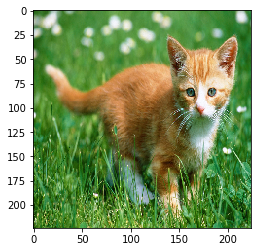

In [0]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

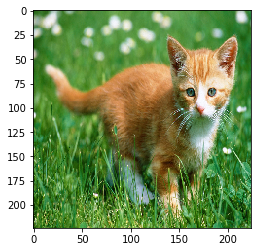

numpy array size (224, 224, 3)


In [0]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 224, 224, 3)


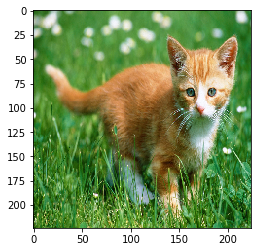

In [0]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

**Predicting the Object Class**

1.  Preprocess the input by subtracting the mean value from each channel of the images in the batch. Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet. The values for Imagenet are : [ 103.939, 116.779, 123.68 ]. This is done using the preprocess_input() function.
1.  Get the classification result, which is a Tensor of dimension ( batchsize x 1000 ). This is done by model.predict() function.
1.  Convert the result to human-readable labels – The vector obtained above has too many values to make any sense. Keras provides a function decode_predictions() which takes the classification results, sorts it according to the confidence of prediction and gets the class name ( instead of a class-number ). We can also specify how many results we want, using the top argument in the function. The output shows the class ID, class name and the confidence of prediction.

In [0]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

In [0]:
processed_image

array([[[[ -71.939    ,  -10.778999 ,  -83.68     ],
         [ -76.939    ,  -15.778999 ,  -88.68     ],
         [ -78.939    ,  -14.778999 ,  -83.68     ],
         ...,
         [ -40.939003 ,   14.221001 ,  -63.68     ],
         [ -42.939003 ,   16.221    ,  -66.68     ],
         [ -38.939003 ,   16.221    ,  -67.68     ]],

        [[ -74.939    ,  -14.778999 ,  -83.68     ],
         [ -77.939    ,  -17.779    ,  -86.68     ],
         [ -80.939    ,  -16.779    ,  -85.68     ],
         ...,
         [ -44.939003 ,   12.221001 ,  -71.68     ],
         [ -32.939003 ,   23.221    ,  -63.68     ],
         [ -39.939003 ,   15.221001 ,  -74.68     ]],

        [[ -78.939    ,  -19.779    ,  -86.68     ],
         [ -77.939    ,  -18.779    ,  -85.68     ],
         [ -76.939    ,  -12.778999 ,  -81.68     ],
         ...,
         [ -46.939003 ,   12.221001 ,  -77.68     ],
         [ -37.939003 ,   17.221    ,  -72.68     ],
         [ -39.939003 ,   15.221001 ,  -78.68     ]],

In [0]:
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
print(predictions.shape)

(1, 1000)


In [0]:
# displaying predictions for the whole 1000 classes
predictions

array([[3.20105937e-05, 2.43836129e-03, 2.00284626e-06, 3.07893538e-06,
        1.15133134e-05, 6.98526201e-05, 3.00288025e-06, 6.89116656e-04,
        5.78525069e-04, 1.99156202e-05, 1.54412428e-05, 2.31429203e-05,
        3.16023215e-05, 1.02843887e-05, 2.39054461e-05, 2.79058702e-04,
        2.71526660e-05, 8.55230537e-05, 1.72140790e-05, 3.88508124e-06,
        1.15095809e-05, 9.84621147e-05, 7.77667537e-06, 1.22778038e-05,
        9.87641215e-06, 1.97931895e-05, 1.23426609e-04, 3.55464028e-04,
        1.18399239e-05, 9.71384434e-05, 1.20226823e-05, 1.46476523e-05,
        5.50661161e-06, 1.79745200e-06, 4.34351676e-07, 4.15808336e-06,
        1.95330995e-05, 3.61467464e-05, 1.10459354e-04, 1.87361147e-05,
        1.41665732e-04, 8.43141243e-06, 8.66729315e-05, 2.60610141e-05,
        6.87303109e-05, 2.34078516e-06, 2.06954152e-04, 7.91156563e-05,
        1.23394716e-06, 2.20309516e-06, 2.93052813e-06, 1.35952432e-04,
        2.72951474e-05, 1.34869861e-05, 3.45141088e-05, 3.226442

In [0]:
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print(label)

[[('n02119022', 'red_fox', 0.17944764), ('n02123159', 'tiger_cat', 0.14142285), ('n02123045', 'tabby', 0.07277971), ('n02124075', 'Egyptian_cat', 0.055186376), ('n02085620', 'Chihuahua', 0.04619666)]]


**next shot**

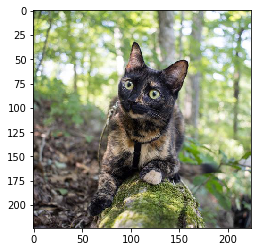

In [0]:
#filename = 'cat.jpg'
url = 'https://raw.githubusercontent.com/Sid2697/Object-Detection-MobileNet/master/MobileNetSSD_deploy.prototxt.txt'
filename = wget.download(url)
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

In [0]:
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
label = decode_predictions(predictions)
print(label)

[[('n02123045', 'tabby', 0.28218108), ('n02123159', 'tiger_cat', 0.23785563), ('n02124075', 'Egyptian_cat', 0.12480161), ('n02127052', 'lynx', 0.0867777), ('n02500267', 'indri', 0.026380936)]]


**an other one**

In [0]:
def vgg_label(image_batch):
  processed_image = vgg16.preprocess_input(image_batch.copy())
  predictions = vgg_model.predict(processed_image)
  return decode_predictions(predictions)

In [0]:
def inception_label(image_batch):
  processed_image = inception_v3.preprocess_input(image_batch.copy())
  predictions = inception_model.predict(processed_image)
  return decode_predictions(predictions)

In [0]:
def resnet_label(image_batch):
  processed_image = resnet50.preprocess_input(image_batch.copy())
  predictions = resnet_model.predict(processed_image)
  return decode_predictions(predictions)

In [0]:
def mobilenet_label(image_batch):
  processed_image = mobilenet.preprocess_input(image_batch.copy())
  predictions = mobilenet_model.predict(processed_image)
  return decode_predictions(predictions)

In [0]:
def image_label(filename):
  original = load_img(filename, target_size=(224, 224))
  plt.imshow(original)
  plt.show()
  numpy_image = img_to_array(original)
  image_batch = np.expand_dims(numpy_image, axis=0)
  print(f'VGG Labels:\n{vgg_label(image_batch)}')
  #print(f'Inception V3 Labels:\n{inception_label(image_batch)}')
  print(f'Resnet 50 Labels:\n{resnet_label(image_batch)}')
  print(f'MobileNet Labels:\n{mobilenet_label(image_batch)}')
  
  # inception V3 requires 

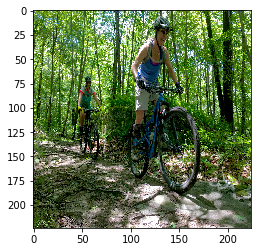

VGG Labels:
[[('n03792782', 'mountain_bike', 0.96881324), ('n02835271', 'bicycle-built-for-two', 0.027039876), ('n09193705', 'alp', 0.0013365546), ('n04509417', 'unicycle', 0.0009120764), ('n09246464', 'cliff', 0.00040176988)]]


ValueError: ignored

In [0]:
#filename='forkrun.jpg'
url = 'https://raw.githubusercontent.com/Sid2697/Object-Detection-MobileNet/master/MobileNetSSD_deploy.prototxt.txt'
filename = wget.download(url)
image_label(filename)

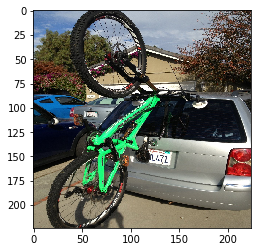

VGG Labels:
[[('n03792782', 'mountain_bike', 0.37779078), ('n02835271', 'bicycle-built-for-two', 0.31730574), ('n04509417', 'unicycle', 0.13340871), ('n04482393', 'tricycle', 0.040697332), ('n03127747', 'crash_helmet', 0.035886683)]]
Resnet 50 Labels:
[[('n03792782', 'mountain_bike', 0.7758866), ('n04509417', 'unicycle', 0.16401078), ('n02835271', 'bicycle-built-for-two', 0.0289038), ('n04482393', 'tricycle', 0.008559915), ('n03127747', 'crash_helmet', 0.0057493714)]]
MobileNet Labels:
[[('n03792782', 'mountain_bike', 0.9475805), ('n04509417', 'unicycle', 0.016133266), ('n02835271', 'bicycle-built-for-two', 0.013158789), ('n03785016', 'moped', 0.0027121927), ('n03594945', 'jeep', 0.0021152494)]]


In [0]:
#filename='bike.jpg'
url = 'https://raw.githubusercontent.com/Sid2697/Object-Detection-MobileNet/master/MobileNetSSD_deploy.prototxt.txt'
filename = wget.download(url)
image_label(filename)

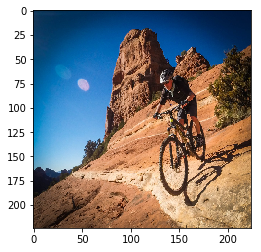

VGG Labels:
[[('n03792782', 'mountain_bike', 0.8454095), ('n09193705', 'alp', 0.12834595), ('n09246464', 'cliff', 0.018885119), ('n02835271', 'bicycle-built-for-two', 0.002545941), ('n09468604', 'valley', 0.0016093751)]]
Resnet 50 Labels:
[[('n03792782', 'mountain_bike', 0.98102576), ('n04509417', 'unicycle', 0.0094144065), ('n02835271', 'bicycle-built-for-two', 0.007857799), ('n09193705', 'alp', 0.0009855798), ('n09246464', 'cliff', 0.0003929117)]]
MobileNet Labels:
[[('n03792782', 'mountain_bike', 0.9779503), ('n09193705', 'alp', 0.019865619), ('n02835271', 'bicycle-built-for-two', 0.0009358282), ('n04509417', 'unicycle', 0.00032616407), ('n09246464', 'cliff', 0.00022406988)]]


In [0]:
#filename='bike2.jpg'
url = 'https://raw.githubusercontent.com/Sid2697/Object-Detection-MobileNet/master/MobileNetSSD_deploy.prototxt.txt'
filename = wget.download(url)
image_label(filename)

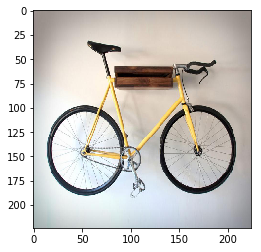

VGG Labels:
[[('n03792782', 'mountain_bike', 0.8434205), ('n02835271', 'bicycle-built-for-two', 0.08260686), ('n04482393', 'tricycle', 0.013156068), ('n03127747', 'crash_helmet', 0.009248416), ('n04485082', 'tripod', 0.00662639)]]
Resnet 50 Labels:
[[('n03792782', 'mountain_bike', 0.8253217), ('n02835271', 'bicycle-built-for-two', 0.07499214), ('n04482393', 'tricycle', 0.030336604), ('n04509417', 'unicycle', 0.010619404), ('n03208938', 'disk_brake', 0.009915984)]]
MobileNet Labels:
[[('n03792782', 'mountain_bike', 0.7281537), ('n02835271', 'bicycle-built-for-two', 0.1330835), ('n04482393', 'tricycle', 0.06419524), ('n03706229', 'magnetic_compass', 0.04815233), ('n03208938', 'disk_brake', 0.01238043)]]


In [0]:
#filename='bike3.jpg'
url = 'https://raw.githubusercontent.com/Sid2697/Object-Detection-MobileNet/master/MobileNetSSD_deploy.prototxt.txt'
filename = wget.download(url)
image_label(filename)

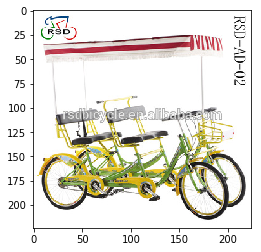

VGG Labels:
[[('n02835271', 'bicycle-built-for-two', 0.37440506), ('n04336792', 'stretcher', 0.1642501), ('n04482393', 'tricycle', 0.12783627), ('n03792782', 'mountain_bike', 0.056535818), ('n04127249', 'safety_pin', 0.04206156)]]
Resnet 50 Labels:
[[('n04482393', 'tricycle', 0.6708842), ('n02835271', 'bicycle-built-for-two', 0.27587044), ('n03792782', 'mountain_bike', 0.031091178), ('n04336792', 'stretcher', 0.007947376), ('n03649909', 'lawn_mower', 0.0023954306)]]
MobileNet Labels:
[[('n04482393', 'tricycle', 0.79044217), ('n02835271', 'bicycle-built-for-two', 0.14044327), ('n03803284', 'muzzle', 0.015783707), ('n03857828', 'oscilloscope', 0.005101293), ('n04204238', 'shopping_basket', 0.0036444922)]]


In [0]:
#filename='seat.jpg'
url = 'https://raw.githubusercontent.com/Sid2697/Object-Detection-MobileNet/master/MobileNetSSD_deploy.prototxt.txt'
filename = wget.download(url)
image_label(filename)

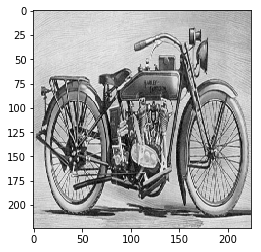

VGG Labels:
[[('n04482393', 'tricycle', 0.749841), ('n03599486', 'jinrikisha', 0.086978965), ('n02835271', 'bicycle-built-for-two', 0.02878277), ('n03785016', 'moped', 0.01101038), ('n03538406', 'horse_cart', 0.00912247)]]
Resnet 50 Labels:
[[('n02835271', 'bicycle-built-for-two', 0.455159), ('n04482393', 'tricycle', 0.450337), ('n03891332', 'parking_meter', 0.008156618), ('n03785016', 'moped', 0.007562663), ('n03764736', 'milk_can', 0.0074518393)]]
MobileNet Labels:
[[('n04482393', 'tricycle', 0.63768286), ('n03599486', 'jinrikisha', 0.19147351), ('n02835271', 'bicycle-built-for-two', 0.08222821), ('n03208938', 'disk_brake', 0.038081832), ('n03785016', 'moped', 0.017144637)]]


In [0]:
#filename='harley.jpg'
url = 'https://raw.githubusercontent.com/Sid2697/Object-Detection-MobileNet/master/MobileNetSSD_deploy.prototxt.txt'
filename = wget.download(url)
image_label(filename)

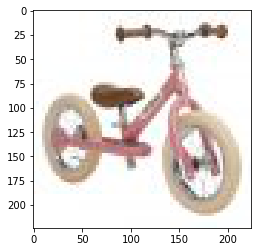

VGG Labels:
[[('n04286575', 'spotlight', 0.20623404), ('n03706229', 'magnetic_compass', 0.16686502), ('n04482393', 'tricycle', 0.13570301), ('n04428191', 'thresher', 0.13314468), ('n03532672', 'hook', 0.08727536)]]
Resnet 50 Labels:
[[('n04482393', 'tricycle', 0.92613393), ('n03785016', 'moped', 0.03647672), ('n02835271', 'bicycle-built-for-two', 0.016943866), ('n03791053', 'motor_scooter', 0.0042133923), ('n03692522', 'loupe', 0.0020366183)]]
MobileNet Labels:
[[('n04482393', 'tricycle', 0.9564753), ('n04067472', 'reel', 0.026503742), ('n03785016', 'moped', 0.0027140372), ('n03706229', 'magnetic_compass', 0.00251961), ('n03791053', 'motor_scooter', 0.0017783075)]]


In [0]:
#filename='draisienne.jpg'
url = 'https://raw.githubusercontent.com/Sid2697/Object-Detection-MobileNet/master/MobileNetSSD_deploy.prototxt.txt'
filename = wget.download(url)
image_label(filename)